In [70]:
import xarray as xr
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Analyze spiking profile depending on feedback type and brain region

In [4]:
dset = xr.load_dataset('../data/steinmetz_2017-11-01_Forssmann.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 359, time: 250, cell: 1769,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 13, spike_id: 3485977)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1765 1766 1767 1768 1769
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'DG' 'LGd' 'SUB' ... 'LSr' 'MOs'
  * spike_id            (spike_id) int32 1 2 3 4 ... 3485975 3485976 3485977
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 0 0 50 25 25 100 0 0 ... 0 100 0 0 100 0 0
    contrast_right      (trial) int8 100 50 25 100 100 100 ... 100 25 100 100 25
    gocue               (trial) float64 0.7917 0.7082 0.4178 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 -1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.09 1.002 0.5842 0.5695 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... 0....
    waveform_u          (cell, waveform_component, probe) float32 0.008219 .....
    lfp                 (brain_area_lfp, trial, time) float64 -5.845 ... 10.82
    spike_time          (spike_id) float32 1.144 1.147 1.149 ... 0.8945 1.742
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1769 1769 1769 1769 1769
    spike_trial         (spike_id) uint32 1 1 1 1 1 1 ... 358 358 359 359 359
Attributes:
    session_date:  2017-11-01
    mouse:         Forssmann
    stim_onset:    0.5
    bin_size:      0.01

In [5]:
cols = ["spike_trial", "spike_cell", "spike_time"]
spike_data = dset[cols].to_dataframe().reset_index()
spike_data

,spike_id,spike_trial,spike_cell,spike_time
0,1,1,1,1.144019
1,2,1,1,1.146752
2,3,1,1,1.149352
3,4,1,1,1.154485
4,5,1,1,1.161752
...,...,...,...,...
3485972,3485973,358,1769,1.938831
3485973,3485974,358,1769,2.197265
3485974,3485975,359,1769,0.033812
3485975,3485976,359,1769,0.894514


### Get spike counts

In [16]:
spike_count_df = spike_data.groupby(["spike_trial", "spike_cell"]).apply(lambda x: len(x)).reset_index()

In [39]:
spike_count_df = spike_data.groupby(["spike_trial", "spike_cell"]).apply(len).reset_index()
spike_count_df = spike_count_df.rename(columns={0: "spike_counts"})

In [56]:
spike_count_df

,spike_trial,spike_cell,spike_counts
0,1,1,10
1,1,3,1
2,1,7,30
3,1,9,25
4,1,10,5
...,...,...,...
419020,359,1763,6
419021,359,1765,15
419022,359,1767,7
419023,359,1768,1


In [64]:
cols = ["brain_area", "feedback_type", "active_trials"]
brain_region_df = dset[cols].to_dataframe().reset_index()
brain_region_df.rename(columns={"cell": "spike_cell"}, inplace=True)
brain_region_df = brain_region_df[brain_region_df.active_trials]
# brain_region_df.drop(columns="trial", inplace=True)
brain_region_df.rename(columns={"trial": "spike_trial"}, inplace=True)
brain_region_df

,spike_cell,spike_trial,brain_area,feedback_type,active_trials
0,1,1,LGd,1.0,True
1,1,2,LGd,1.0,True
2,1,3,LGd,-1.0,True
3,1,4,LGd,1.0,True
4,1,5,LGd,1.0,True
...,...,...,...,...,...
634956,1769,245,ACA,-1.0,True
634957,1769,246,ACA,-1.0,True
634958,1769,247,ACA,-1.0,True
634959,1769,248,ACA,-1.0,True


In [65]:
df = pd.merge(spike_count_df, brain_region_df)

In [67]:
df

,spike_trial,spike_cell,spike_counts,brain_area,feedback_type,active_trials
0,1,1,10,LGd,1.0,True
1,1,3,1,TH,1.0,True
2,1,7,30,TH,1.0,True
3,1,9,25,TH,1.0,True
4,1,10,5,LGd,1.0,True
...,...,...,...,...,...,...
289890,249,1760,7,LSr,-1.0,True
289891,249,1763,2,ACA,-1.0,True
289892,249,1765,11,ACA,-1.0,True
289893,249,1767,13,LSr,-1.0,True


(-15.0, 50.0)

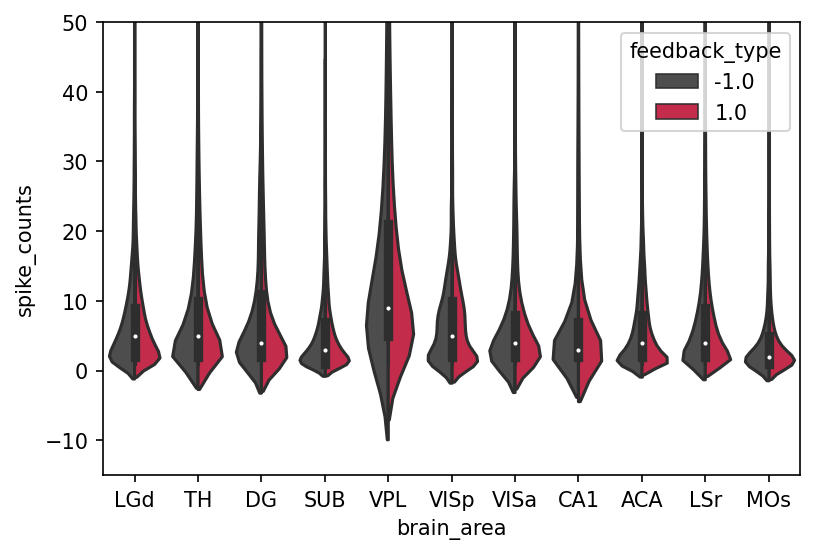

In [81]:
plt.figure(dpi=150)
sns.violinplot(data=df, x="brain_area", y="spike_counts", split=True, hue="feedback_type", palette=[".3", "crimson"])
plt.ylim(-15, 50)

<AxesSubplot:xlabel='brain_area', ylabel='spike_counts'>

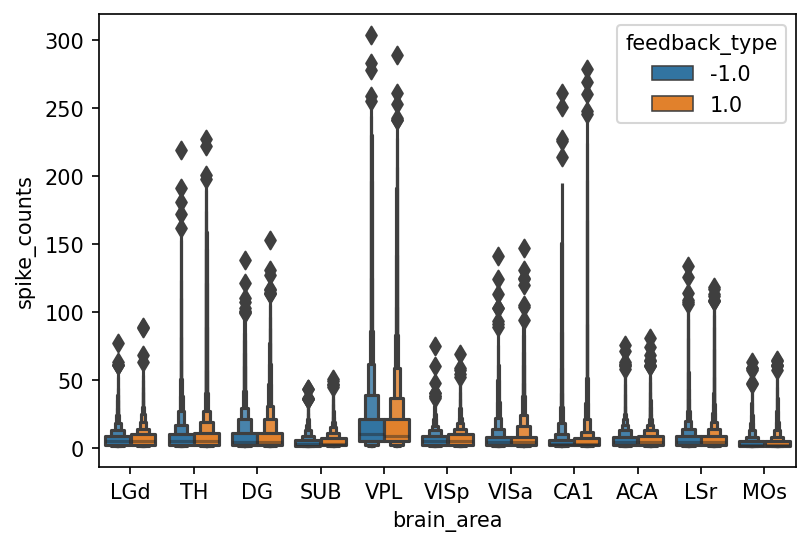

In [73]:
plt.figure(dpi=150)
sns.boxenplot(data=df, x="brain_area", y="spike_counts", hue="feedback_type")